# 0. Introdution
## 0.1 Project objectives
Brain tumors pose a significant health risk, and early detection is crucial for successful treatment. This project aims to develop a deep learning model using Convolutional Neural Networks (CNNs) to accurately identify brain tumors in Magnetic Resonance Imaging (MRI) scans. By leveraging the power of TensorFlow and Streamlit, we have created a user-friendly web application that allows for easy input of MRI images and provides rapid, automated tumor detection results. This tool has the potential to assist medical professionals in making timely and informed decisions, ultimately improving patient outcomes.
## 0.2 Classification
A classifier is a machine learning model that categorizes data into predefined classes. Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for image recognition. They use a technique called convolution to extract features from images, making them highly effective for tasks like image classification. TensorFlow is a popular open-source library used to build and train deep learning models, including CNNs. Deep learning, a subset of machine learning, involves training artificial neural networks with multiple layers to learn complex patterns from large datasets. In this project, we utilize a CNN built with TensorFlow to classify brain MRI scans as either containing a tumor or not.

# 1. Install Dependencies and Setup
## 1.1 Library 
### Tensorflow
We employed the TensorFlow library to construct and train our deep learning model.
### OpenCV
We utilized the OpenCV library to preprocess and augment the brain MRI images in our dataset.
### MatPlot
## 1.2 Install packages

In [1]:
pip install tensorflow opencv-python matplotlib keras streamlit

Note: you may need to restart the kernel to use updated packages.


## 1.3 Import
Import necessary libraries, Import the TensorFlow library for deep learning operations.

In [3]:
import tensorflow as tf
import streamlit as st
import os
import cv2
import imghdr
import io
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

## 1.4 GPU Setup
Avoid OOM errors by setting GPU Memory Consumption Growth.

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.5 Image Setup

In [5]:
data = tf.keras.utils.image_dataset_from_directory('archive', batch_size=32, image_size=(256, 256))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 4512 files belonging to 2 classes.


I0000 00:00:1734706483.521043   13181 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1054 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [12]:
batch = data_iterator.next()

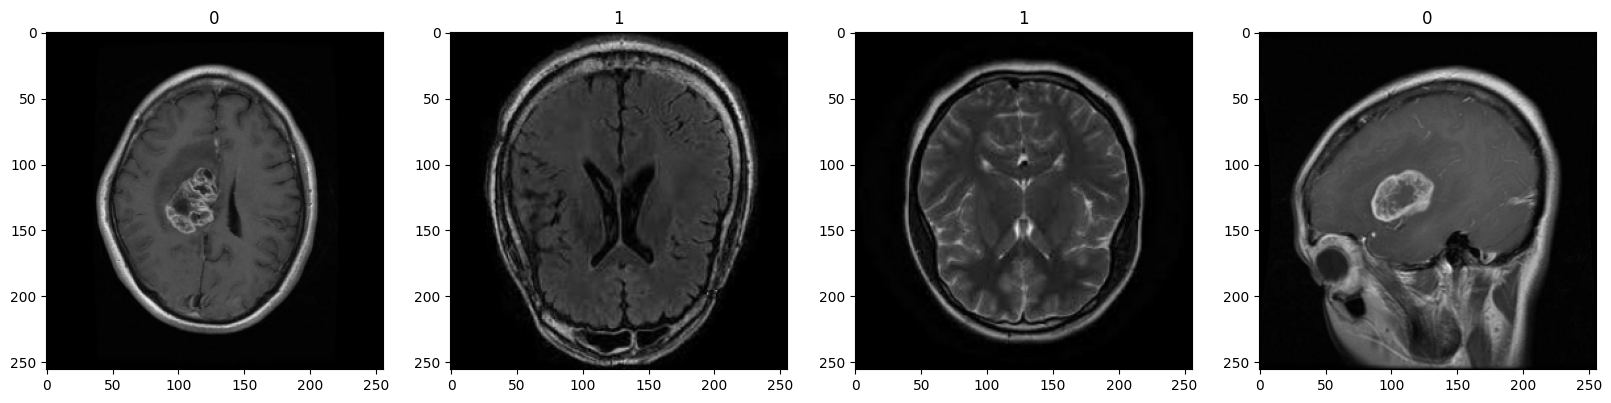

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
batch[0].shape

(32, 256, 256, 3)

# 2. Pre-Processing
## 2.1 Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y)) 

In [16]:
len(data)

141

## 2.2 Train and Test Size
We use 70% (3200 - 100 batch) of images for train our model and 20% (896 - 28 batch) of images for evaluate our model and 10% (448 - 14 batch) for test out model.

In [17]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

## 2.3 Allocate Image to Train and Test

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model
## 3.1 Build Deep Learning Model
We use Sequential becouse it is fast and easy, better for one input and one output models than functional.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

 Now, create a model and establish.

In [20]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) #relu or sigmoid activation
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

/home/shahriar/miniconda3/envs/env312/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


I0000 00:00:1734706523.323631   13343 service.cc:148] XLA service 0x760de8004c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734706523.323735   13343 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-12-20 18:25:23.485093: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734706523.640397   13343 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-20 18:25:27.498174: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 3/99 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6823 - loss: 0.8592

I0000 00:00:1734706527.859148   13343 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7025 - loss: 0.6031 - val_accuracy: 0.8873 - val_loss: 0.2892
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8985 - loss: 0.2663 - val_accuracy: 0.9219 - val_loss: 0.2252
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9451 - loss: 0.1282 - val_accuracy: 0.9509 - val_loss: 0.1586
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9822 - loss: 0.0519 - val_accuracy: 0.9576 - val_loss: 0.1658
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9598 - val_loss: 0.1890
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9942 - loss: 0.0248 - val_accuracy: 0.9732 - val_loss: 0.1525
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9929 - loss: 0.0186 - val_accuracy: 0.9710 - val_loss: 0.1455
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9676 - val_loss: 0

In [26]:
hist.history

{'accuracy': [0.7686237096786499,
  0.9068813323974609,
  0.9542297720909119,
  0.9857954382896423,
  0.9921085834503174,
  0.9921085834503174,
  0.9943181872367859,
  0.9987373948097229,
  0.9977903962135315,
  0.9990530014038086],
 'loss': [0.4929905831813812,
  0.23653385043144226,
  0.114497609436512,
  0.0450294129550457,
  0.026039907708764076,
  0.026935270056128502,
  0.016697997227311134,
  0.004980686120688915,
  0.005767103284597397,
  0.008195457048714161],
 'val_accuracy': [0.8872767686843872,
  0.921875,
  0.9508928656578064,
  0.9575892686843872,
  0.9598214030265808,
  0.9732142686843872,
  0.9709821343421936,
  0.9676339030265808,
  0.9765625,
  0.9720982313156128],
 'val_loss': [0.28917524218559265,
  0.22520609200000763,
  0.1585521250963211,
  0.16584734618663788,
  0.18904326856136322,
  0.15245506167411804,
  0.14551685750484467,
  0.16241911053657532,
  0.13972899317741394,
  0.15206241607666016]}

## 3.3 Plot Performance
### Loss

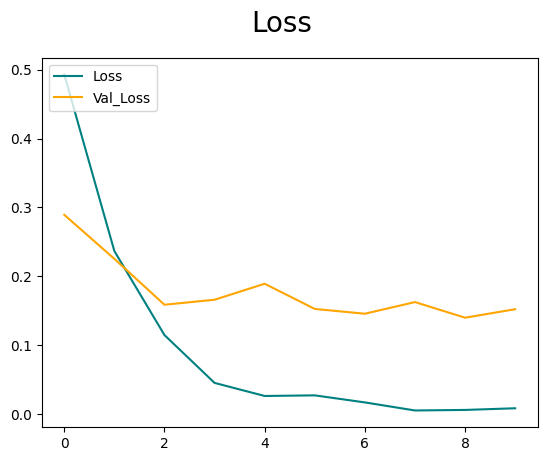

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Val_Loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

### Accuracy

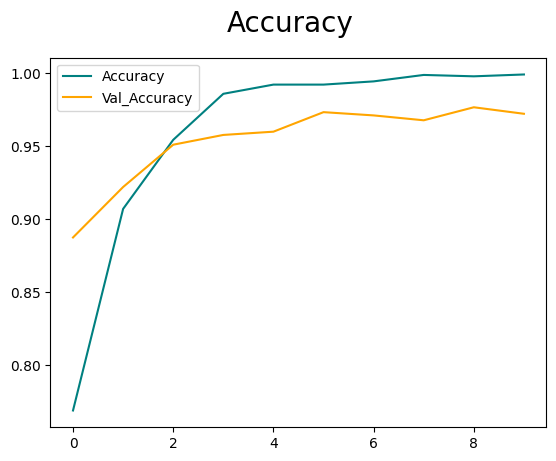

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Val_Accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# 4. Evaluate Performance
## 4.1 Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


2024-12-20 19:02:16.242258: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
print(f'Precision: {precision.result().numpy() * 100}%')
print(f'Recall: {recall.result().numpy() * 100}%')
print(f'Accuracy: {acc.result().numpy() * 100}%')

Precision: 95.81395721435547%
Recall: 96.71361541748047%
Accuracy: 96.42857360839844%


## 4.2 Test

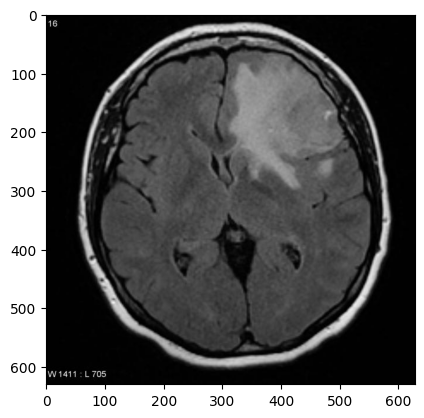

In [60]:
img = cv2.imread('Cancer.jpg')
plt.imshow(img)

<function matplotlib.pyplot.show(close=None, block=None)>

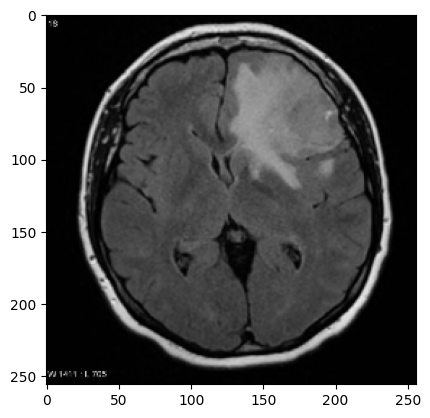

In [61]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [63]:
yhat

array([[0.0001957]], dtype=float32)

In [64]:
if yhat > 0.5:
    print('Healthy')
    print(f'Accuracy: {yhat[0][0] * 100} %')
else:
    print('Cancer')
    print(f'Error percentage: {yhat[0][0] * 100} %')


Cancer
Error percentage: 0.019569633528590202 %


# 5. Save the Model
## 5.1 Save the model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models', 'braintumordetectionmodel.h5'))

In [51]:
loaded_model = load_model(os.path.join('models', 'braintumordetectionmodel.h5'))

## 5.2 Use saved model

<function matplotlib.pyplot.show(close=None, block=None)>

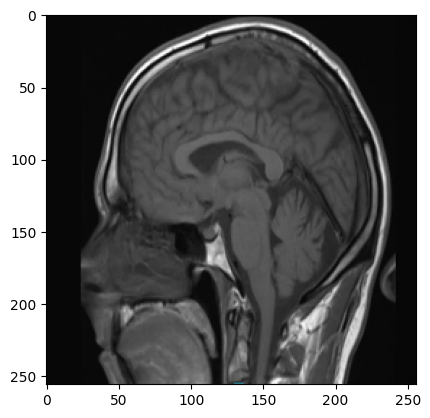

In [58]:
image = cv2.imread('Pasted image.png')
resize_image = tf.image.resize(img, (256, 256))

plt.imshow(resize_image.numpy().astype(int))
plt.show

In [59]:
if loaded_model.predict(np.expand_dims(resize_image/255, 0)) > 0.5:
    print('Healthy')
    print(f'Accuracy: {yhat[0][0] * 100} %')
else:
    print('Cancer')
    print(f'Error percentage: {yhat[0][0] * 100} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Healthy
Accuracy: 99.9995346069336 %


# 6. App
## 6.1 Using Streamlit

In [53]:
st.title('Cancer Detection App')

2024-12-20 19:04:26.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:26.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [54]:
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

2024-12-20 19:04:29.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:29.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:29.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:29.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:29.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [55]:
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image.", use_column_width=True)
    
    try:
        image_bytes = uploaded_file.getvalue()
        image_np = np.frombuffer(image_bytes, np.uint8)
        img = cv2.imdecode(image_np, cv2.IMREAD_COLOR)
        resize_upload = tf.image.resize(img, (256, 256))
        uphat = model.predict(np.expand_dims(resize_upload / 255, 0))
    
        if yhat > 0.5:
            st.write("Prediction: Healthy")
        else:
            st.write("Prediction: Cancer")

        st.write(f"Confidence: {yhat[0][0]:.4f}")

    except Exception as e:
        st.error(f"Error processing the image: {e}")

st.markdown("""
**How to use:**

1. Upload an image (jpg, png, or jpeg).
2. The app will process the image and make a prediction.
3. The result will be displayed below the image.

**Note:** This is a demonstration app and should not be used for actual medical diagnosis. Always consult with a qualified healthcare professional for any health concerns.
""")

2024-12-20 19:04:30.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 19:04:30.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()